<a href="https://colab.research.google.com/github/ChicagoPark/chicago_work/blob/main/json_parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요 라이브러리 Import

In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# 기본 json 실습코드에 포함되어있던 것처럼 사용하는 모듈은 해당 셀에 명시하였습니다.

# 구글 드라이브 마운트

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls

drive/  sample_data/


## 주석, 이미지 압축 파일 해제

In [4]:
%%capture
'''
!unzip Annotations.zip -d Annotations
!zip -FFv Images.zip --out Images_.zip
!unzip Images_.zip -d Images
'''
# 위 방법으로 데이터를 읽어오면 Google Drive 에서 읽어오는 속도가 느리므로, Colab 디렉터리로 가져오는 작업 (보고서 고찰 첫번째)
# json_parsing 강의에서 조교님의 디렉터리 구성을 보고, 그에 맞게 아래 경로와 같이 로딩을 하였습니다 !
!unzip "/content/drive/MyDrive/빅데이터및AI/Annotations.zip" -d "/content/Annotations"
!unzip "/content/drive/MyDrive/빅데이터및AI/Images_.zip" -d "/content/Images"

In [5]:
ls

Annotations/  drive/  Images/  sample_data/


## 주석, 이미지 파일 확인

In [6]:
# "Annotations/" 에 있는 파일 불러오기
annots = os.listdir('Annotations')    # Annotations 에 있는 모든 파일명들이 string 의 list 로 저장이 된다.
# "Images/" 에 있는 파일 불러오기
images = os.listdir('Images/Images')  # Images 에 있는 모든 파일명들이 string 의 list 로 저장이 된다.

# 가장 앞에있는 데이터를 사용하기에 정렬알고리즘을 활용하여 sorted 파일명을 받아온다. (가장 앞에 있는 이미지를 받아오는 실습과제의 의도에 맞게 sorting 하였습니다. 공지된 이름을 직접 명시하는 것을 간단히 해결하였습니다.)
annots = sorted(annots)
images = sorted(images)

print(len(annots), len(images))

5975 5975


In [7]:
# 주석 파일 오픈
# annoations 는 json 형태로 저장이 되어있다. # json : 딕셔너리 형태로 key 와 value 가 정해져있는 것
with open(f'Annotations/{annots[0]}') as f:
  json_file = json.load(f)                  # json_file 에 딕셔너리 형태로 파일을 읽어온다.

In [8]:
# 주석 파일은 Dictionary 타입으로, key와 value로 이루어짐
# key 값 확인
json_file.keys()

dict_keys(['info', 'images', 'annotations', 'categories'])

In [9]:
# 'info' value 확인
json_file['info']

{'contributor': 'Konkuk_university',
 'date_created': '2021/05/12',
 'description': 'V0F_HY_0000_20201007_155530_E_CH0_Busan_Sun_Mainroad_Day_91178_BBOX JSON file',
 'url': '',
 'version': '1.0',
 'year': 2021}

In [10]:
# 'images' value 확인
json_file['images']

{'file_name': 'V0F_HY_0000_20201007_155530_E_CH0_Busan_Sun_Mainroad_Day_91178.png',
 'height': 720,
 'id': 1,
 'width': 1280}

In [11]:
# 'annotations' value 확인
json_file['annotations']

[{'area': 3038.917435688946,
  'bbox': [864.6860136485835, 0, 32.64630867856897, 93.08609636727098],
  'category_id': 2,
  'id': 1,
  'image_id': 1,
  'is_crowd': 0,
  'polyline': [],
  'segmentation': []},
 {'area': 1572.524883240999,
  'bbox': [679.0911488752403,
   56.67131391536984,
   31.350088548927943,
   50.16014167828479],
  'category_id': 5,
  'id': 2,
  'image_id': 1,
  'is_crowd': 0,
  'polyline': [],
  'segmentation': []},
 {'area': 570.2147366929746,
  'bbox': [672.5799766381552,
   57.877086551867066,
   12.781189946870654,
   44.613587550397526],
  'category_id': 5,
  'id': 3,
  'image_id': 1,
  'is_crowd': 0,
  'polyline': [],
  'segmentation': []}]

In [12]:
# 'categories' value 확인
json_file['categories']

[{'id': 1, 'name': 'Animals(Dolls)'},
 {'id': 2, 'name': 'Person'},
 {'id': 3, 'name': 'Garbage bag & sacks'},
 {'id': 4, 'name': 'Construction signs & Parking prohibited board'},
 {'id': 5, 'name': 'Traffic cone'},
 {'id': 6, 'name': 'Box'},
 {'id': 7, 'name': 'Stones on road'},
 {'id': 8, 'name': 'Pothole on road'},
 {'id': 9, 'name': 'Filled pothole'},
 {'id': 10, 'name': 'Manhole'}]

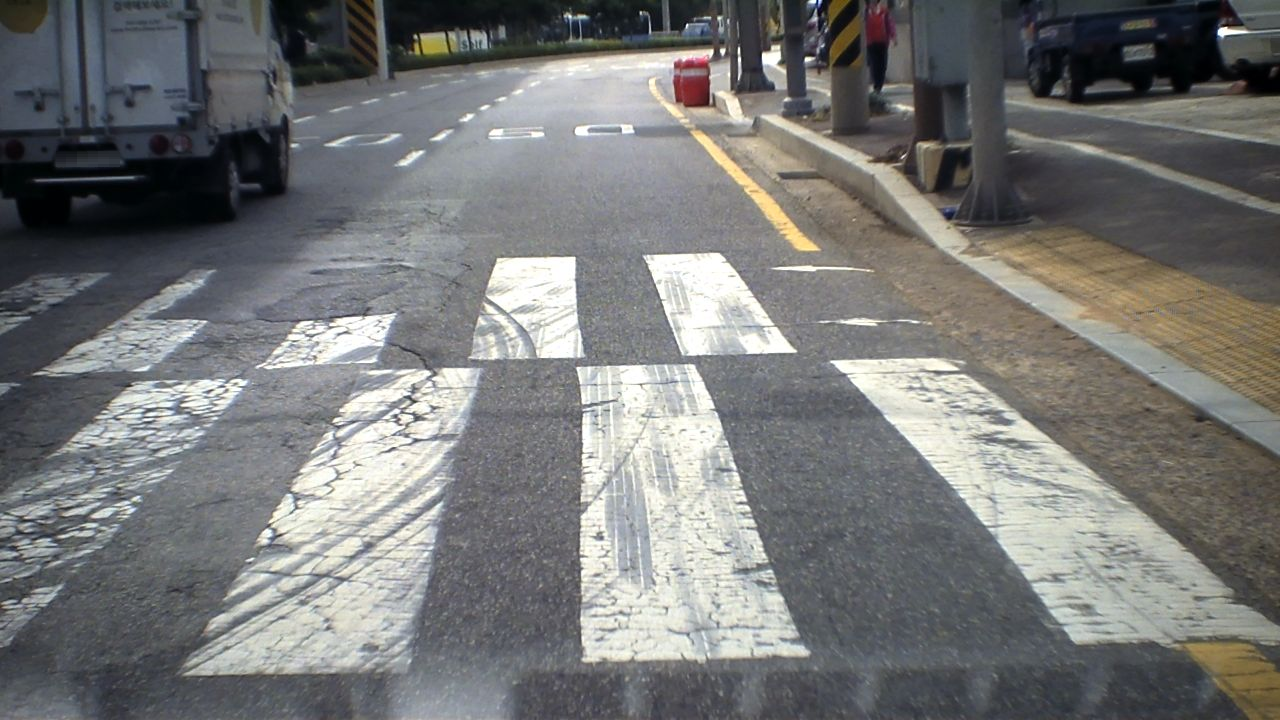

In [13]:
# 이미지 파일 오픈
from PIL import Image
Image.open(f'Images/Images/{images[0]}')

### 이미지에 주석 적용하여 객체 bounding box 표시하기

- PIL 라이브러리의 ImageDraw 모듈 활용
- json의 'annotations' value 이용

- 정답 예시

![image](https://raw.githubusercontent.com/pyeon9/Lecture-BigData-AI/main/image_annotation.png?token=AL7QGG622SZFU32VNRUB4F3BSHPMA)

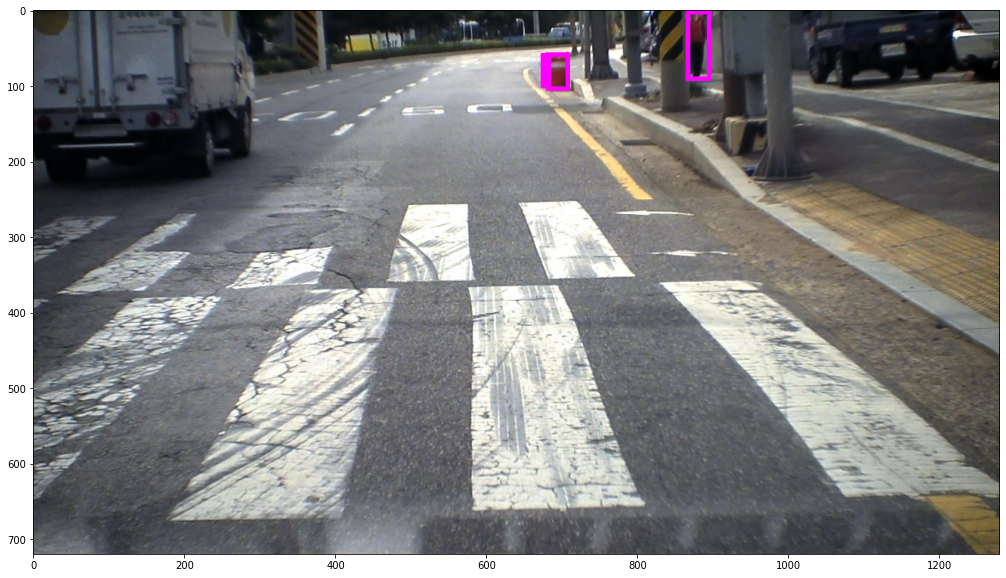

In [14]:
# Box 를 그리는데에 필요한 라이브러리
from PIL import ImageDraw

# image 객체를 만들어준다.
img_open = Image.open(f'Images/Images/{images[0]}').convert('RGBA')
# 이미지에 해당하는 annot 파일을 받아온다.
with open(f'Annotations/{annots[0]}') as f:
  json_file = json.load(f)

# your code here
''' rectangle 에 명시해줄 shape 좌표
coordinates = [(x1, y1), (x2, y2)]

    (x1, y1)
        *--------------
        |             |
        |             |
        |             |
        |             |
        |             |
        |             |
        --------------*
                      (x2, y2)
'''
# 1. 0 번째 annot 파일에 몇개의 객체가 인식이 되었는지 확인
num_object = len(json_file['annotations'])
# 2. 이미지 상에 bounding boxes plotting 작업을 위한 라인
draw = ImageDraw.Draw(img_open)
# 3. 해당 이미지 내에 인식된 물체의 수만큼 반복문을 돌도록 설계
for i in range(num_object):
  # 변수이름에 명시한 바와 같이 x, y, w, h 임을 염두
  image_x = json_file['annotations'][i]['bbox'][0]
  image_y = json_file['annotations'][i]['bbox'][1]
  width = json_file['annotations'][i]['bbox'][2]
  height = json_file['annotations'][i]['bbox'][3]
  # 상자를 좌표를 명시하는 코드이다. 위에 그림으로 표시해준 것과 같이 ((x1, y1), (x1+w, y1+h)) 로 좌표를 명시해준 코드이다.
  shape = [(image_x, image_y), (image_x + width, image_y + height)]
  # 최대한 정답과 비슷한 컬러와 bounding box 선의 굵기를 조절
  draw.rectangle(shape, outline ="#FF00FF", width=6)
  
# image 를 출력해주는 코드
plt.figure(figsize=(20,10))
plt.imshow(np.array(img_open))
plt.show()

# 카테고리에 따라 파일 분류

- 7 : Stones on road
- 8 : Pothole on road
- 9 : Filled pothole
- 중복은 제외   
</br>
- 주석 파일을 카테고리에 맞는 리스트에 append()

In [15]:
# 고려해야할 id 명시
'''
{'id': 7, 'name': 'Stones on road'},
{'id': 8, 'name': 'Pothole on road'},
{'id': 9, 'name': 'Filled pothole'},
'''
# 제공 코드로, 내부 루프에서 조건을 충족하는 데이터를 해당 리스트에 append 해주게 된다.
stone = []
pothole = []
filled = []

for a in annots:
  # your code here
  with open(f'Annotations/{a}') as f:
    json_file = json.load(f)                      # json_file 에 딕셔너리 형태로 파일을 읽어온다.
  
  stone_count = 0                                 # 중복 데이터를 제외시키기위한 count 를 추가
  pothole_count = 0
  filled_count = 0
  # annot 파일에 몇개의 객체가 인식이 되었는지 확인 후 루프에 반영
  num_object = len(json_file['annotations'])
  for i in range(num_object):
    # 카테고리 아이디를 받아오는 코드
    ID = json_file['annotations'][i]['category_id']
    # ID 가 7, 8, 9 가 들어오면 앞서 만들어준 _count 변수를 증가시킨다.
    if ID == 7:
      stone_count += 1
    elif ID == 8:
      pothole_count += 1
    elif ID == 9:
      filled_count +=1
  # stone, pothole, filled 사이 중복없이 한 레이블에 데이터만 존재하는 경우를 고려.
  # False 라는 불린형을 사용한 이유는 예를 들어, 한 이미지에 pothole 이 여러개 존재해도 pothole_count 를 1로 고려하기 위함이다.
  if (stone_count !=False) + (pothole_count!=False) + (filled_count != False) == 1:
    # 그 한 레이블이 stone 인 경우 append
    if stone_count != False:
      stone.append(a)
    # 그 한 레이블이 pothole 인 경우 append
    if pothole_count != False:
      pothole.append(a)
    # 그 한 레이블이 filled 인 경우 append
    if filled_count != False:
      filled.append(a)

In [16]:
print(len(stone), len(pothole), len(filled))

99 354 674


## 분류된 이미지 새 디렉토리로 복사
- shutil 라이브러리의 copy() 함수 활용
- `make_output_dir()` 함수로 디렉토리 구조를 생성
- 주석 파일과 이미지 파일을 각각 "Annotations/"와 "Images/" 디렉토리로 복사

In [17]:
# 주어진 디렉토리 아래 "Annotations/"와 "Images/"의 두 디렉토리 생성 (좌측과 같이 문제에 명시가 되어있는데, 예제코드는 Images/Images 라서 num_stone 으로 길이를 받아올때 1개가 추가적으로 찍혀서 수정하였습니다.)
def make_output_dir(category):
    os.makedirs(f'{category}/Annotations')
    os.makedirs(f'{category}/Images')    

In [18]:
# 카테고리별 디렉토리 생성
make_output_dir('0. stone')
make_output_dir('1. pothole')
make_output_dir('2. filled')

In [19]:
# 위에서 생성한 디렉토리에 주석 파일과 이미지 파일 이동
import shutil

def copy_files(json_lst, category):
    for j in json_lst:
        # your code here
        # 앞서 명시한 설명과 동일
        with open(f'Annotations/{j}') as f:
            json_file = json.load(f)

        # json 파일명을 받는 코드    
        annot_file_name = f"{json_file['info']['description'].split()[0]}.json"
        
        # image의 파일명을 받아오는 코드
        image_file_name = json_file['images']['file_name']
        
        # ~에서, ~ 로 파일을 복사해준다.
        shutil.copy(f'Annotations/{annot_file_name}', f'{category}/Annotations')
        shutil.copy(f'Images/Images/{image_file_name}', f'{category}/Images')

In [23]:
copy_files(stone, '0. stone')
copy_files(pothole, '1. pothole')
copy_files(filled, '2. filled')

In [24]:
num_stone_img = os.listdir('0. stone/Images')
num_pothole_img = os.listdir('1. pothole/Images')
num_filled_img  = os.listdir('2. filled/Images')
# Images 들이 잘 옮겨졌는지 확인
print(len(num_stone_img), len(num_pothole_img), len(num_filled_img))

99 354 674


In [25]:
num_stone_annot = os.listdir('0. stone/Annotations')
num_pothole_annot = os.listdir('1. pothole/Annotations')
num_filled_annot  = os.listdir('2. filled/Annotations')

# Annotations 들이 잘 옮겨졌는지 확인
print(len(num_stone_annot), len(num_pothole_annot), len(num_filled_annot))

99 354 674
